## 1. MSE Scikit-learn

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
y_true = [91, 51, 2.5, 2, -5]
y_pred = [90, 48, 2, 2, -4]

In [3]:
mean_squared_error(y_true, y_pred)

2.25

## 2. Accuracy Scikit-learn

In [4]:
y_pred = [0, 1, 0, 1, 0, 1, 0]
y_true = [0, 0, 1, 1, 1, 1, 0]

In [5]:
accuracy_score(y_true, y_pred)

0.5714285714285714

## 3. Regression

In [6]:
# imports
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [7]:
# data
housing = fetch_california_housing()
X, y = housing['data'], housing['target']

In [8]:
# split data train test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    shuffle=True,
    random_state=13)

In [9]:
# pipeline
pipeline = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
]
pipe = Pipeline(pipeline)

In [10]:
# fit
pipe.fit(X_train, y_train)

,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [11]:
y_train_preds = pipe.predict(X_train)
y_train_preds[:10]

array([1.54505951, 2.21338527, 2.2636205 , 3.3258957 , 1.51710076,
       1.63209319, 2.9265211 , 0.78080924, 1.21968217, 0.72656239])

In [12]:
y_test_preds = pipe.predict(X_test)
y_test_preds[:10]

array([ 1.82212706,  1.98357668,  0.80547979, -0.19259114,  1.76072418,
        3.27855815,  2.12056804,  1.96099917,  2.38239663,  1.21005304])

In [13]:
r2_score(y_train, y_train_preds), r2_score(y_test, y_test_preds)

(0.6079874818809448, 0.5903435927516574)

In [14]:
mean_squared_error(y_train, y_train_preds), mean_squared_error(y_test, y_test_preds)

(0.5210784446797678, 0.5537420654727396)

In [15]:
mean_absolute_error(y_train, y_train_preds), mean_absolute_error(y_test, y_test_preds)

(0.5300159371615256, 0.5454023699809112)

## 4. Classification

In [16]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix

In [17]:
X, y = load_breast_cancer(return_X_y=True)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=43)

In [19]:
scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)

In [20]:
classifier = LogisticRegression()
#classifier.fit(X_train_scaled, y_train)

In [21]:
pipe = Pipeline([
    ("scaler", scaler),
    ("classifier", classifier)
])
pipe.fit(X_train, y_train)
y_train_preds = pipe.predict(X_train)
y_test_preds = pipe.predict(X_test)

y_train_probs = pipe.predict_proba(X_train)[:, 1]
y_test_probs =  pipe.predict_proba(X_test)[:, 1]
y_train_preds[:10], y_test_preds[:10]

(array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0]), array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0]))

In [22]:
def score(y_true, y_pred, y_probs):
    print("f1:", f1_score(y_true, y_pred))
    print("accuracy:", accuracy_score(y_true, y_pred))
    print("precison:", precision_score(y_true, y_pred))
    print("recall:", recall_score(y_true, y_pred))
    print("roc_auc:", roc_auc_score(y_true, y_probs))

In [23]:
score(y_train, y_train_preds, y_train_probs)

f1: 0.9911504424778761
accuracy: 0.989010989010989
precison: 0.9893992932862191
recall: 0.9929078014184397
roc_auc: 0.998995613495675


In [24]:
score(y_test, y_test_preds, y_test_probs)

f1: 0.9801324503311258
accuracy: 0.9736842105263158
precison: 0.9736842105263158
recall: 0.9866666666666667
roc_auc: 0.9863247863247864


In [25]:
confusion_matrix(y_test, y_test_preds)

array([[37,  2],
       [ 1, 74]])

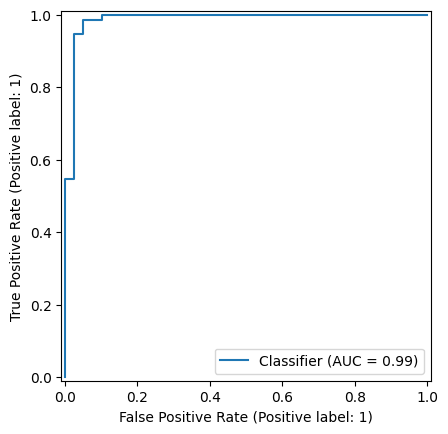

In [26]:
RocCurveDisplay.from_predictions(y_test, y_test_probs)
plt.show()

## 5. Machine Learning Models

In [27]:
# imports
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# data
housing = fetch_california_housing()
X, y = housing['data'], housing['target']
# split data train test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    shuffle=True,
                                                    random_state=43)
# pipeline
pipeline = [('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
            ('lr', LinearRegression())]
pipe = Pipeline(pipeline)
# fit
pipe.fit(X_train, y_train)


,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [28]:
def score(y_true, y_pred):
    print("r2: ", r2_score(y_true, y_pred))
    print("mae: ", mean_absolute_error(y_true, y_pred))
    print("mse: ", mean_squared_error(y_true, y_pred))

In [29]:
def def_pipe(model, title):
    pipeline = [('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', model)]
    pipe = Pipeline(pipeline)
    pipe.fit(X_train, y_train)

    y_preds_test = pipe.predict(X_test)
    y_preds_train = pipe.predict(X_train)

    print(f"{title}:\n")
    print("Train: \n")
    score(y_train, y_preds_train)
    print("\nTest: \n")
    score(y_test, y_preds_test)

In [30]:
def_pipe(LinearRegression(), "Linear Regression")

Linear Regression:

Train: 

r2:  0.6054131599242077
mae:  0.5330920012614552
mse:  0.5273648371379568

Test: 

r2:  0.6128959462132963
mae:  0.5196420310323715
mse:  0.49761195027083804


In [31]:
def_pipe(SVR(), "SVM")

SVM:

Train: 

r2:  0.7496108582936643
mae:  0.3835645163325985
mse:  0.3346447867133914

Test: 

r2:  0.7295080649899692
mae:  0.3897680598426783
mse:  0.3477101776542994


In [32]:
def_pipe(DecisionTreeRegressor(random_state=43), "Decision Tree")

Decision Tree:

Train: 

r2:  1.0
mae:  4.221907539810565e-17
mse:  9.24499456646287e-32

Test: 

r2:  0.6228217144931267
mae:  0.4403051356589147
mse:  0.4848526395290697


In [33]:
def_pipe(RandomForestRegressor(random_state=43), "Random Forest")

Random Forest:

Train: 

r2:  0.9741263135396302
mae:  0.12000198560508221
mse:  0.03458015083247723

Test: 

r2:  0.8119778189909694
mae:  0.3194169859011629
mse:  0.24169750554364758


In [34]:
def_pipe(GradientBoostingRegressor(random_state=43), "Gradient Boosting")

Gradient Boosting:

Train: 

r2:  0.8042086499063384
mae:  0.3565654303668227
mse:  0.26167490389525294

Test: 

r2:  0.7895081234643192
mae:  0.36455447680396397
mse:  0.270581700642181


## 6. Grid Search

In [35]:
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [36]:
cv_grid = [(np.arange(18576), np.arange(18576,20640))]
model = RandomForestRegressor
housing = fetch_california_housing()
X, y = housing["data"], housing["target"]

In [37]:
# 1. Load the California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# 2. Define the model
rf = RandomForestRegressor(random_state=42)

In [38]:
# 3. Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

# 4. Define the custom CV split
cv_split = [(np.arange(18576), np.arange(18576, 20640))]

In [39]:
# 5. Set up the Grid Search
gs = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv_split,
    n_jobs=-1,
    verbose=2
)

# 6. Run the grid search
gs.fit(X, y)

Fitting 1 folds for each of 27 candidates, totalling 27 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 2, ...], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,"[(array([ 0,...hape=(18576,)), ...)]"
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [40]:
# 7. Function to extract the best model, params, and score
def select_model_verbose(gs):
    trained_model = gs.best_estimator_
    best_params = gs.best_params_
    best_score = gs.best_score_
    return trained_model, best_params, best_score

In [41]:

# 8. Retrieve the best model and parameters
trained_model, best_params, best_score = select_model_verbose(gs)

print("✅ Best Parameters:", best_params)
print("🏆 Best CV Score:", best_score)

# 9. Predict on a new data point
new_point = np.array([[3.2031, 52., 5.47761194, 1.07960199, 910., 2.26368159, 37.85, -122.26]])
prediction = trained_model.predict(new_point)
print("📈 Prediction for new point:", prediction)

✅ Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 200}
🏆 Best CV Score: 0.7076786376376507
📈 Prediction for new point: [2.42941465]
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=  26.0s
[CV] END ..max_depth=10, min_samples_leaf=2, n_estimators=50; total time=  26.2s
[CV] END .max_depth=10, min_samples_leaf=4, n_estimators=200; total time= 1.9min
[CV] END ...max_depth=5, min_samples_leaf=4, n_estimators=50; total time=  13.6s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=  57.4s
[CV] END .max_depth=20, min_samples_leaf=1, n_estimators=100; total time= 1.5min
[CV] END ..max_depth=5, min_samples_leaf=4, n_estimators=100; total time=  25.6s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time= 1.0min
[CV] END ..max_depth=20, min_samples_leaf=2, n_estimators=50; total time=  43.3s
[CV] END ..max_depth=20, min_samples_leaf=4, n_estimators=50; total time=  36.9s
[CV] END ..max_depth=5, min_samp